In [33]:
import pandas as pd

# For loading data as Pandas Dataframe
import numpy as np

# For performing Matrix Calculations
import seaborn as sns

# For visualizing statistical results
import scipy.stats as s

# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For evaluating the performance of the model

In [34]:
data = pd.read_excel("fitur_combined.xlsx")
data

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,66.258988,61.227073,67.783226,65.158415,2.446483,0.055664,0.356445,0.263221,47.929862,72.003950,1.502277,1
1,64.446686,55.173210,58.302508,56.017323,0.943396,0.061523,0.308594,0.270054,41.226092,66.227144,1.606438,1
2,62.692141,99.537279,79.573600,75.421263,3.571429,0.042969,0.290039,0.286273,56.264081,128.622281,2.286046,1
3,63.433824,92.245610,64.134624,60.074981,4.487179,0.056641,0.389648,0.316059,45.349569,121.406513,2.677126,1
4,62.803729,58.825938,82.869466,79.547163,2.258065,0.047852,0.297852,0.333677,58.597402,58.808881,1.003609,1
...,...,...,...,...,...,...,...,...,...,...,...,...
185,70.512001,121.400499,60.089971,46.602647,21.574344,0.044922,0.200195,8.853937,42.489846,166.242701,3.912528,1
186,63.837491,68.303569,16.419694,11.170535,0.634921,0.044922,0.196289,9.148392,11.601794,95.424618,8.224988,1
187,65.434255,83.814507,26.463381,22.214413,1.552795,0.049805,0.343750,9.183100,18.712321,117.029363,6.254134,1
188,64.655115,64.178214,15.536588,10.012316,0.626959,0.045898,0.381836,9.248109,10.985468,89.981724,8.190978,1


In [35]:
data_columns = data.columns
data_columns

Index(['HR', 'SDNN', 'RMSSD', 'SDSD', 'pNN50', 'LF', 'HF', 'LF/HF', 'SD1',
       'SD2', 'SD_ratio', 'Label'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR        190 non-null    float64
 1   SDNN      190 non-null    float64
 2   RMSSD     190 non-null    float64
 3   SDSD      190 non-null    float64
 4   pNN50     190 non-null    float64
 5   LF        190 non-null    float64
 6   HF        190 non-null    float64
 7   LF/HF     190 non-null    float64
 8   SD1       190 non-null    float64
 9   SD2       190 non-null    float64
 10  SD_ratio  190 non-null    float64
 11  Label     190 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 17.9 KB


In [37]:
data_copy = data.replace(to_replace=["0", "1"], value=[0, 1], inplace=False)
data_copy

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,66.258988,61.227073,67.783226,65.158415,2.446483,0.055664,0.356445,0.263221,47.929862,72.003950,1.502277,1
1,64.446686,55.173210,58.302508,56.017323,0.943396,0.061523,0.308594,0.270054,41.226092,66.227144,1.606438,1
2,62.692141,99.537279,79.573600,75.421263,3.571429,0.042969,0.290039,0.286273,56.264081,128.622281,2.286046,1
3,63.433824,92.245610,64.134624,60.074981,4.487179,0.056641,0.389648,0.316059,45.349569,121.406513,2.677126,1
4,62.803729,58.825938,82.869466,79.547163,2.258065,0.047852,0.297852,0.333677,58.597402,58.808881,1.003609,1
...,...,...,...,...,...,...,...,...,...,...,...,...
185,70.512001,121.400499,60.089971,46.602647,21.574344,0.044922,0.200195,8.853937,42.489846,166.242701,3.912528,1
186,63.837491,68.303569,16.419694,11.170535,0.634921,0.044922,0.196289,9.148392,11.601794,95.424618,8.224988,1
187,65.434255,83.814507,26.463381,22.214413,1.552795,0.049805,0.343750,9.183100,18.712321,117.029363,6.254134,1
188,64.655115,64.178214,15.536588,10.012316,0.626959,0.045898,0.381836,9.248109,10.985468,89.981724,8.190978,1


In [38]:
corr_df = data.corr()
corr_df

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
HR,1.000000,0.277869,0.079719,0.143264,-0.115263,0.009243,-0.192032,0.379927,0.079731,0.290813,0.091029,NaN
SDNN,0.277869,1.000000,0.493677,0.416071,0.482871,-0.033100,-0.332973,0.216897,0.493647,0.989565,0.162973,NaN
RMSSD,0.079719,0.493677,1.000000,0.971334,0.376820,0.068821,-0.001475,-0.317580,1.000000,0.367866,-0.698256,NaN
SDSD,0.143264,0.416071,0.971334,1.000000,0.155386,0.059388,0.104472,-0.288369,0.971333,0.287187,-0.691841,NaN
pNN50,-0.115263,0.482871,0.376820,0.155386,1.000000,0.093390,-0.417168,-0.121496,0.376825,0.466713,-0.182453,NaN
LF,0.009243,-0.033100,0.068821,0.059388,0.093390,1.000000,-0.089265,-0.083904,0.068822,-0.046832,-0.106125,NaN
HF,-0.192032,-0.332973,-0.001475,0.104472,-0.417168,-0.089265,1.000000,-0.190434,-0.001471,-0.361328,-0.157861,NaN
LF/HF,0.379927,0.216897,-0.317580,-0.288369,-0.121496,-0.083904,-0.190434,1.000000,-0.317581,0.279586,0.582710,NaN
SD1,0.079731,0.493647,1.000000,0.971333,0.376825,0.068822,-0.001471,-0.317581,1.000000,0.367836,-0.698302,NaN
SD2,0.290813,0.989565,0.367866,0.287187,0.466713,-0.046832,-0.361328,0.279586,0.367836,1.000000,0.275284,NaN


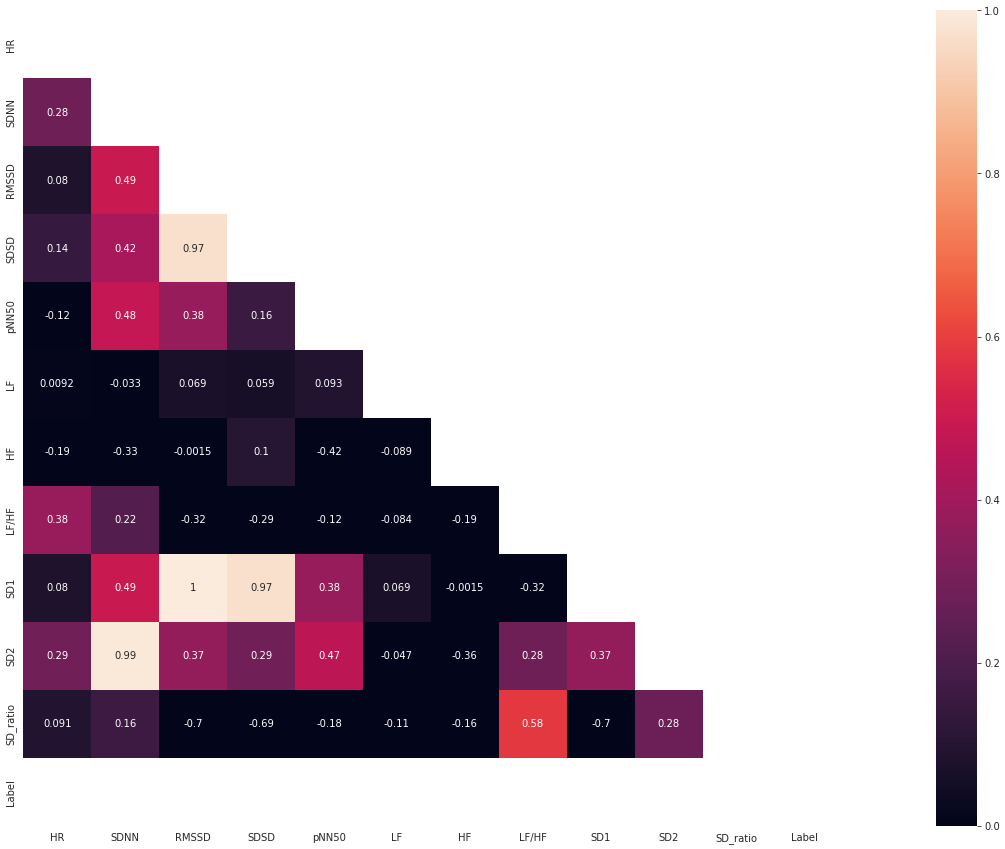

In [39]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = (
    True  # True = generate a mask of lower triangle of matrix
)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35, 15))
    sns.heatmap(data=corr_df, vmin=0, vmax=1, mask=mask, square=True, annot=True)

In [40]:
strong_relation_features = (
    pd.Series(corr_df["Label"]).nlargest(n=8).iloc[1:]
)  # nlargest(n=9)==> take 8 features
strong_relation_features

SDNN    NaN
RMSSD   NaN
SDSD    NaN
pNN50   NaN
LF      NaN
HF      NaN
LF/HF   NaN
Name: Label, dtype: float64